# Código para o método PROMETHEE-Score

iniciarei importando algumas bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from PROMETHEE import PROMETHEE_2

In [2]:
dados = pd.read_excel("dados.xlsx", index_col=0)
dados = dados.dropna(axis=0)
dados.loc["Hong Kong"]

Property Rights           93.3
Judical Effectiveness     75.3
Government Integrity      83.8
Tax Burden                93.1
Gov't Spending            90.3
Fiscal Health            100.0
Business Freedom          96.4
Labor Freedom             89.2
Monetary Freedom          86.4
Trade Freedom             95.0
Investment Freedom        90.0
Financial Freedom         90.0
Name: Hong Kong, dtype: float64

In [3]:
X = np.array(dados) # decision matrix
m, n = X.shape
q = np.array([5 for j in range (n)]) # indiference thresholds vector
p = np.array([10 for j in range (n)]) # preference thresholds vector
s_curve = [0 for j in range (n)]
pref = [5 for j in range (n)]
w = np.random.dirichlet(np.ones(n),size=1).reshape(n) # weights

In [4]:
# Aplica o PROMETHEE_2 ao nosso conjunto de dados

net_flows = PROMETHEE_2(Decision_Matrix = X, q_thresholds=q, p_thresholds= p, scurve_thresholds = s_curve, weights = w, pref_functions= pref)[1]

In [5]:
pd.DataFrame(net_flows, index=dados.index).loc["Hong Kong"]

0    0.864491
Name: Hong Kong, dtype: float64

### SMAA

- Vamos agora rodar o PROMETHEE no mesmo conjunto de dados, porém, usaremos variáveis aleatórias.

In [6]:
n_simulations = 30

W = np.zeros(shape = (n, n_simulations))
P = np.zeros(shape = (n, n_simulations))
Q = np.zeros(shape = (n, n_simulations))

Net_Flows = np.zeros(shape = (m, n_simulations))
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]

# Usaremos sempre a função de preferência do tipo 5
s_curve = [0 for j in range (n)] 
pref = [5 for j in range (n)]

for s in range (n_simulations):
    W [:,s] = np.random.dirichlet(np.ones(n),size=1).reshape(n) # weights
    Q [:,s] = np.random.uniform (2,6, n)
    P [:,s] = np.random.uniform (8, 12, n)
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed


In [7]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= dados.index)
Sigma_Mu_df.columns


Index(['Sigma', 'Mu'], dtype='object')

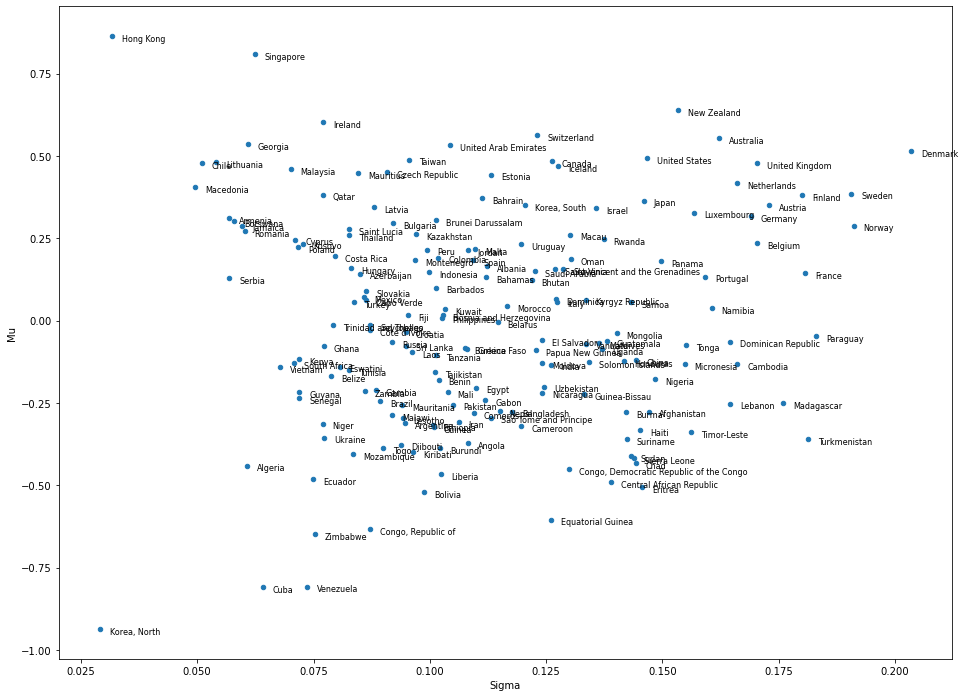

In [8]:
from matplotlib import cm

fig, ax = plt.subplots()

cmap = cm.get_cmap('Spectral')

Sigma_Mu_df.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (16,12))

for k, v in Sigma_Mu_df.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='black')

In [9]:
# Possívei ideia de usar KMeans antes da otimização

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(Sigma_Mu_df)
kmeans.labels_

Sigma_Mu_df.assign(Category = kmeans.labels_)

Sigma_Mu_df_clusters = Sigma_Mu_df.assign(Category = kmeans.labels_)
Sigma_Mu_df_clusters


C:\Users\igor2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\igor2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Sigma,Mu,Category
Afghanistan,0.147007,-0.276695,0
Albania,0.112378,0.164540,1
Algeria,0.060675,-0.440237,0
Angola,0.108216,-0.372014,0
Argentina,0.094706,-0.310699,0
...,...,...,...
Vanuatu,0.133642,-0.069670,3
Venezuela,0.073681,-0.807537,4
Vietnam,0.067805,-0.141470,3
Zambia,0.085998,-0.213390,0


In [10]:
Sigma_Mu_df_clusters.to_excel("Clusters.xlsx")

In [11]:
A = kmeans.cluster_centers_
A

array([[ 0.11286024, -0.32589202],
       [ 0.10999676,  0.22300129],
       [ 0.11217038,  0.49965696],
       [ 0.11449343, -0.05909776],
       [ 0.07585972, -0.74003501]])

In [12]:
A_df = pd.DataFrame(A)
A_df

,0,1
0,0.112860,-0.325892
1,0.109997,0.223001
2,0.112170,0.499657
3,0.114493,-0.059098
4,0.075860,-0.740035


### PKFs 

In the cell below, I'll obtain the PKFs for the Sigma-Mu plot 

In [13]:
df =A_df.copy()

In [14]:
df

,0,1
0,0.112860,-0.325892
1,0.109997,0.223001
2,0.112170,0.499657
3,0.114493,-0.059098
4,0.075860,-0.740035


In [15]:
df =A_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1



PKF_1: [1, 2, 4]
PKF_2: [0, 3]


### Otimização

O Score das alternativas é obtido através de um modelo de otimização linear.

In [16]:
from PROMETHEE import optimize_PROM2_original, optimize_newconstraint

m = A_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (A_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (A_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([A_df.iloc[unit]]) # get the alternative unit
        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (A_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        
        
        M, resultado = optimize_PROM2_original(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')
        


alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 2: resolvido.


In [17]:
global_ef = np.sum(local_ef, axis = 1)
results = pd.DataFrame({"Global Efficiency": global_ef}, index = A_df.index).sort_values("Global Efficiency", ascending = False)
results = results.assign(Position = [i+1 for i in range(results.shape[0])])
results.loc[4]

Global Efficiency    0.037001
Position             3.000000
Name: 4, dtype: float64

In [18]:
#global_ef_new = np.sum(local_ef_new, axis = 1)
#results_new = pd.DataFrame({"Global Efficiency": global_ef_new}, index = Sigma_Mu_df.index).sort_values("Global Efficiency", ascending = False)
#results_new = results_new.assign(Position = [i+1 for i in range(results.shape[0])])
#results_new.loc["Korea, North "]

# DADOS TCC TUANY

In [19]:
dados = pd.read_excel("dados_TCC.xlsx", index_col=0)
dados = dados.dropna(axis=0)
dados.loc["Brazil"]


Economic Quality                    47.953634
Education                           59.270767
Enterprise Conditions               47.827354
Governance                          51.796293
Health                              72.023236
Infrastructure and Market Access    54.907069
Investment Environment              56.183145
Living Conditions                   80.422237
Natural Environment                 67.827058
Personal Freedom                    66.955451
Safety and Security                 61.247103
Social Capital                      48.436590
Name: Brazil, dtype: float64

In [20]:
X = np.array(dados) # decision matrix
m, n = X.shape
q = np.array([5 for j in range (n)]) # indiference thresholds vector
p = np.array([10 for j in range (n)]) # preference thresholds vector
s_curve = [0 for j in range (n)]
pref = [5 for j in range (n)]
w = np.random.dirichlet(np.ones(n),size=1).reshape(n) # weights

In [21]:
# Aplica o PROMETHEE_2 ao nosso conjunto de dados

net_flows = PROMETHEE_2(Decision_Matrix = X, q_thresholds=q, p_thresholds= p, scurve_thresholds = s_curve, weights = w, pref_functions= pref)[1]

In [22]:
pd.DataFrame(net_flows, index=dados.index).loc["Brazil"]

0   -0.09771
Name: Brazil, dtype: float64

In [23]:
n_simulations = 30

W = np.zeros(shape = (n, n_simulations))
P = np.zeros(shape = (n, n_simulations))
Q = np.zeros(shape = (n, n_simulations))

Net_Flows = np.zeros(shape = (m, n_simulations))
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]

# Usaremos sempre a função de preferência do tipo 5
s_curve = [0 for j in range (n)] 
pref = [5 for j in range (n)]

for s in range (n_simulations):
    W [:,s] = np.random.dirichlet(np.ones(n),size=1).reshape(n) # weights
    Q [:,s] = np.random.uniform (2,6, n)
    P [:,s] = np.random.uniform (8, 12, n)
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed


In [24]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= dados.index)
Sigma_Mu_df.columns

Index(['Sigma', 'Mu'], dtype='object')

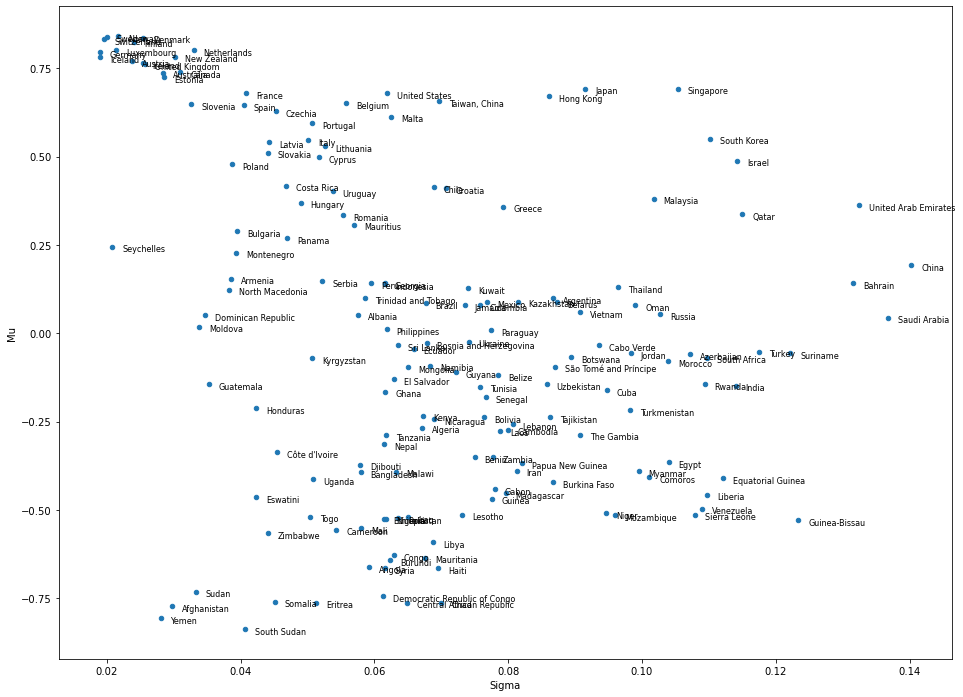

In [25]:
from matplotlib import cm

fig, ax = plt.subplots()

cmap = cm.get_cmap('Spectral')

Sigma_Mu_df.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (16,12))

for k, v in Sigma_Mu_df.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='black')

In [26]:
# Possívei ideia de usar KMeans antes da otimização

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(Sigma_Mu_df)
kmeans.labels_

Sigma_Mu_df.assign(Category = kmeans.labels_)

Sigma_Mu_df_clusters = Sigma_Mu_df.assign(Category = kmeans.labels_)
Sigma_Mu_df_clusters

C:\Users\igor2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\igor2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Sigma,Mu,Category
Afghanistan,0.029740,-0.772823,1
Albania,0.057544,0.052799,0
Algeria,0.067131,-0.267203,3
Angola,0.059125,-0.661682,1
Argentina,0.086765,0.098734,0
...,...,...,...
Venezuela,0.109017,-0.495805,1
Vietnam,0.090737,0.060006,0
Yemen,0.028038,-0.805510,1
Zambia,0.077715,-0.351085,3


In [27]:
Sigma_Mu_df_clusters.to_excel("ClustersLegatum.xlsx")

In [28]:
A = kmeans.cluster_centers_
A

array([[ 0.07980167,  0.0302095 ],
       [ 0.06644898, -0.60165889],
       [ 0.04067354,  0.73158835],
       [ 0.07696689, -0.2794402 ],
       [ 0.06445706,  0.40321769]])

In [29]:
A_df = pd.DataFrame(A)
A_df

,0,1
0,0.079802,0.030210
1,0.066449,-0.601659
2,0.040674,0.731588
3,0.076967,-0.279440
4,0.064457,0.403218


In [30]:
df =A_df.copy()

In [31]:
df

,0,1
0,0.079802,0.030210
1,0.066449,-0.601659
2,0.040674,0.731588
3,0.076967,-0.279440
4,0.064457,0.403218


In [32]:
df =A_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1


PKF_1: [2]
PKF_2: [4]
PKF_3: [0, 1, 3]


In [33]:
from PROMETHEE import optimize_PROM2_original, optimize_newconstraint

m = A_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (A_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (A_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([A_df.iloc[unit]]) # get the alternative unit
        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (A_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        
        
        M, resultado = optimize_PROM2_original(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')
        

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 2, fronteira 3: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 4, fronteira 3: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 2: resolvido.
alternative 5, fronteira 3: resolvido.


In [34]:
global_ef = np.sum(local_ef, axis = 1)
results = pd.DataFrame({"Global Efficiency": global_ef}, index = A_df.index).sort_values("Global Efficiency", ascending = False)
results = results.assign(Position = [i+1 for i in range(results.shape[0])])
results.loc[1]

Global Efficiency   -0.027767
Position             3.000000
Name: 1, dtype: float64

In [25]:
#global_ef_new = np.sum(local_ef_new, axis = 1)
#results_new = pd.DataFrame({"Global Efficiency": global_ef_new}, index = Sigma_Mu_df.index).sort_values("Global Efficiency", ascending = False)
#results_new = results_new.assign(Position = [i+1 for i in range(results.shape[0])])
#results_new.loc["South Sudan"]

Global Efficiency    -21.974838
Position             167.000000
Name: South Sudan, dtype: float64

In [35]:
#PROMETHEE I PARA FLUXO POSITIVO

In [36]:
X = np.array(dados) # decision matrix
m, n = X.shape
q = np.array([5 for j in range (n)]) # indiference thresholds vector
p = np.array([10 for j in range (n)]) # preference thresholds vector
s_curve = [0 for j in range (n)]
pref = [5 for j in range (n)]
w = np.random.dirichlet(np.ones(n),size=1).reshape(n) # weights

In [37]:
# Aplica o PROMETHEE_1 ao nosso conjunto de dados

pos_flows = PROMETHEE_2(Decision_Matrix = X, q_thresholds=q, p_thresholds= p, scurve_thresholds = s_curve, weights = w, pref_functions= pref)[2]


In [38]:
pd.DataFrame(pos_flows, index=dados.index).loc["Brazil"]

0    0.413397
Name: Brazil, dtype: float64

In [39]:
n_simulations = 30

W = np.zeros(shape = (n, n_simulations))
P = np.zeros(shape = (n, n_simulations))
Q = np.zeros(shape = (n, n_simulations))

Net_Flows = np.zeros(shape = (m, n_simulations))
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]

# Usaremos sempre a função de preferência do tipo 5
s_curve = [0 for j in range (n)] 
pref = [5 for j in range (n)]

for s in range (n_simulations):
    W [:,s] = np.random.dirichlet(np.ones(n),size=1).reshape(n) # weights
    Q [:,s] = np.random.uniform (2,6, n)
    P [:,s] = np.random.uniform (8, 12, n)
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed


In [40]:
mu_pos = np.mean(Pos_Flows, axis=1)
sigma_pos = np.std(Pos_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_pos,"Mu": mu_pos}, index= dados.index)
Sigma_Mu_df.columns

Index(['Sigma', 'Mu'], dtype='object')

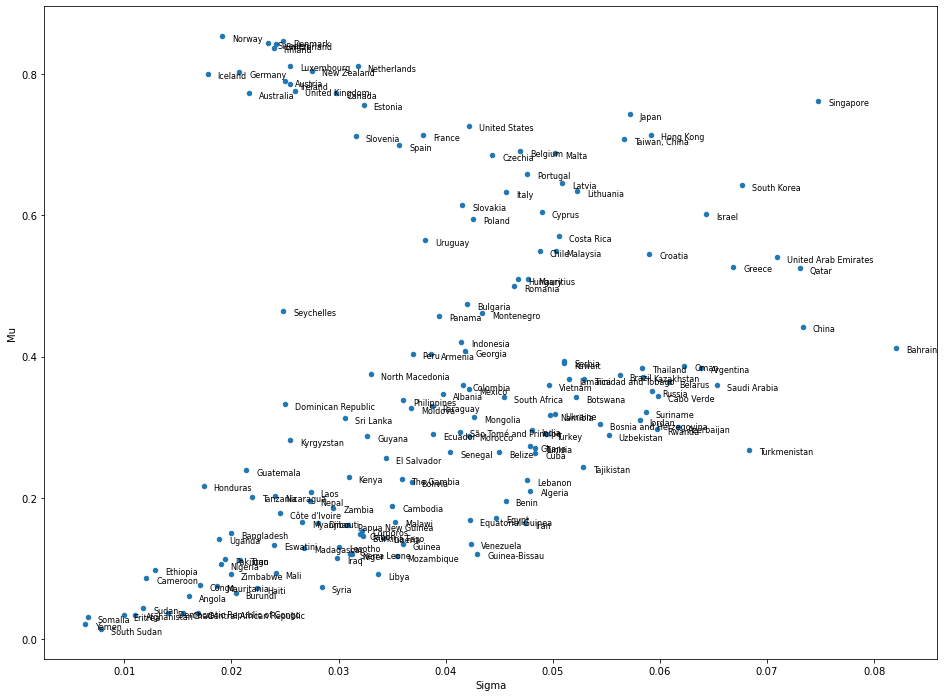

In [41]:
from matplotlib import cm

fig, ax = plt.subplots()

cmap = cm.get_cmap('Spectral')

Sigma_Mu_df.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (16,12))

for k, v in Sigma_Mu_df.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='black')

In [42]:
# Possívei ideia de usar KMeans antes da otimização

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(Sigma_Mu_df)
kmeans.labels_

Sigma_Mu_df.assign(Category = kmeans.labels_)

Sigma_Mu_df_clusters = Sigma_Mu_df.assign(Category = kmeans.labels_)
Sigma_Mu_df_clusters

C:\Users\igor2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\igor2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Sigma,Mu,Category
Afghanistan,0.011049,0.034633,1
Albania,0.039779,0.346597,0
Algeria,0.047920,0.210089,3
Angola,0.016023,0.060917,1
Argentina,0.063824,0.384183,0
...,...,...,...
Venezuela,0.042391,0.135219,1
Vietnam,0.049627,0.359503,0
Yemen,0.006316,0.020912,1
Zambia,0.029499,0.186055,3


In [43]:
Sigma_Mu_df_clusters.to_excel("ClustersPosFlow.xlsx")

In [44]:
A = kmeans.cluster_centers_
A

array([[0.0489683 , 0.38057042],
       [0.02476039, 0.10614838],
       [0.034649  , 0.76867141],
       [0.04143748, 0.25912673],
       [0.05298554, 0.57602566]])

In [45]:
A_df = pd.DataFrame(A)
A_df

,0,1
0,0.048968,0.380570
1,0.024760,0.106148
2,0.034649,0.768671
3,0.041437,0.259127
4,0.052986,0.576026


In [46]:
df =A_df.copy()

In [47]:
df

,0,1
0,0.048968,0.380570
1,0.024760,0.106148
2,0.034649,0.768671
3,0.041437,0.259127
4,0.052986,0.576026


In [48]:
df =A_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: [1, 2]
PKF_2: [0, 3, 4]


In [49]:
from PROMETHEE import optimize_PROM1_original_pos_flow, optimize_newconstraint_pos_flow

m = A_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (A_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (A_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([A_df.iloc[unit]]) # get the alternative unit
        
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (A_df.loc[PKF[fr]]) # get alternatives within frontier fr or a less preferred one
        
        M, resultado = optimize_PROM1_original_pos_flow(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_newconstraint_pos_flow(unit_sigmamu, Fr_sigmamu)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')
        
        #print(f'local_ef = {local_ef[unit, fr]}')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 2: resolvido.


In [50]:
global_ef = np.sum(local_ef, axis = 1)
results = pd.DataFrame({"Global Efficiency": global_ef}, index = A_df.index).sort_values("Global Efficiency", ascending = False)
results = results.assign(Position = [i+1 for i in range(results.shape[0])])
results.loc[1]

Global Efficiency    0.016677
Position             2.000000
Name: 1, dtype: float64

In [51]:
#global_ef_new = np.sum(local_ef_new, axis = 1)
#results_new = pd.DataFrame({"Global Efficiency": global_ef_new}, index = Sigma_Mu_df.index).sort_values("Global Efficiency", ascending = False)
#results_new = results_new.assign(Position = [i+1 for i in range(results.shape[0])])
#results_new.loc["Yemen"]

In [52]:
#PROMETHEE I PARA FLUXO NEGATIVO

In [53]:
X = np.array(dados) # decision matrix
m, n = X.shape
q = np.array([5 for j in range (n)]) # indiference thresholds vector
p = np.array([10 for j in range (n)]) # preference thresholds vector
s_curve = [0 for j in range (n)]
pref = [5 for j in range (n)]
w = np.random.dirichlet(np.ones(n),size=1).reshape(n) # weights

In [54]:
# Aplica o PROMETHEE_2 ao nosso conjunto de dados

neg_flows = PROMETHEE_2(Decision_Matrix = X, q_thresholds=q, p_thresholds= p, scurve_thresholds = s_curve, weights = w, pref_functions= pref)[3]

In [55]:
pd.DataFrame(neg_flows, index=dados.index).loc["Brazil"]

0    0.327015
Name: Brazil, dtype: float64

In [56]:
n_simulations = 30

W = np.zeros(shape = (n, n_simulations))
P = np.zeros(shape = (n, n_simulations))
Q = np.zeros(shape = (n, n_simulations))

Net_Flows = np.zeros(shape = (m, n_simulations))
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]

# Usaremos sempre a função de preferência do tipo 5
s_curve = [0 for j in range (n)] 
pref = [5 for j in range (n)]

for s in range (n_simulations):
    W [:,s] = np.random.dirichlet(np.ones(n),size=1).reshape(n) # weights
    Q [:,s] = np.random.uniform (2,6, n)
    P [:,s] = np.random.uniform (8, 12, n)
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed


In [57]:
mu_neg = np.mean(Neg_Flows, axis=1)
sigma_neg = np.std(Neg_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_neg,"Mu": mu_neg}, index= dados.index)
Sigma_Mu_df.columns

Index(['Sigma', 'Mu'], dtype='object')

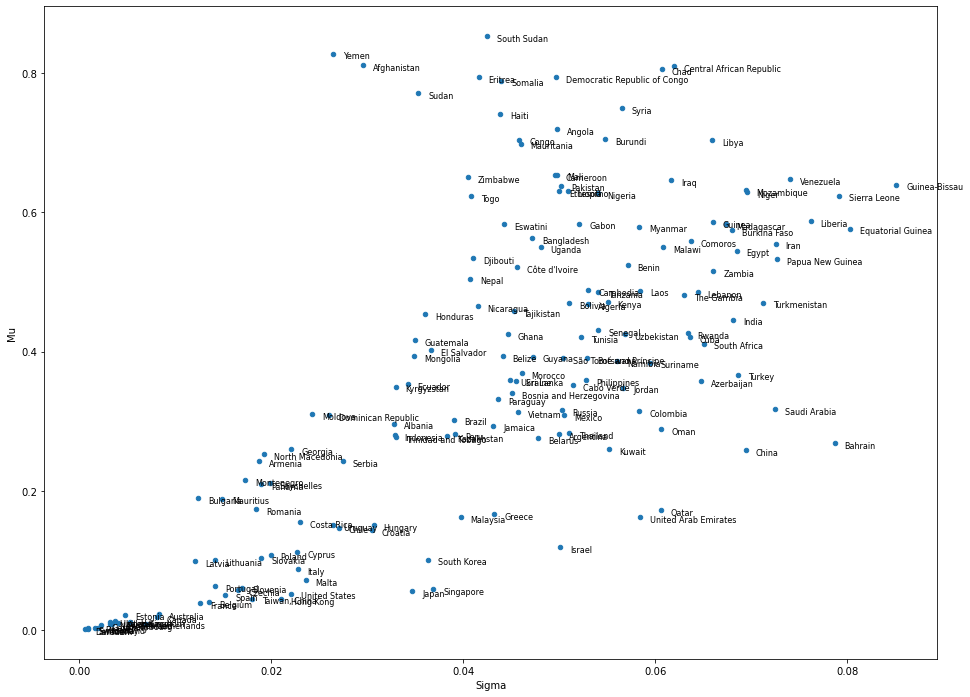

In [58]:
from matplotlib import cm

fig, ax = plt.subplots()

cmap = cm.get_cmap('Spectral')

Sigma_Mu_df.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (16,12))

for k, v in Sigma_Mu_df.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='black')

In [59]:
# Possívei ideia de usar KMeans antes da otimização

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(Sigma_Mu_df)
kmeans.labels_

Sigma_Mu_df.assign(Category = kmeans.labels_)

Sigma_Mu_df_clusters = Sigma_Mu_df.assign(Category = kmeans.labels_)
Sigma_Mu_df_clusters

C:\Users\igor2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\igor2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Sigma,Mu,Category
Afghanistan,0.029532,0.811775,2
Albania,0.032761,0.296381,3
Algeria,0.052986,0.467751,1
Angola,0.049742,0.719785,2
Argentina,0.049939,0.281034,3
...,...,...,...
Venezuela,0.073981,0.647638,4
Vietnam,0.045665,0.313059,3
Yemen,0.026439,0.827871,2
Zambia,0.066050,0.515836,4


In [60]:
Sigma_Mu_df_clusters.to_excel("ClustersNegFlow.xlsx")

In [61]:
A = kmeans.cluster_centers_
A

array([[0.01559963, 0.05804405],
       [0.05183088, 0.41378174],
       [0.04713401, 0.76753049],
       [0.03981902, 0.25815135],
       [0.05943989, 0.58925188]])

In [62]:
A_df = pd.DataFrame(A)
A_df

,0,1
0,0.015600,0.058044
1,0.051831,0.413782
2,0.047134,0.767530
3,0.039819,0.258151
4,0.059440,0.589252


In [63]:
df =A_df.copy()

In [64]:
df

,0,1
0,0.015600,0.058044
1,0.051831,0.413782
2,0.047134,0.767530
3,0.039819,0.258151
4,0.059440,0.589252


In [65]:
df =A_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] < comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] < comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: [2, 4]
PKF_2: [1]
PKF_3: [3]
PKF_4: [0]


In [66]:
from PROMETHEE import optimize_PROM1_original_neg_flow, optimize_newconstraint_neg_flow

m = A_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (A_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (A_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([A_df.iloc[unit]]) # get the alternative unit
        
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (A_df.loc[PKF[fr]]) # get alternatives within frontier fr or a dominated one
        
        M, resultado = optimize_PROM1_original_neg_flow(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_newconstraint_neg_flow(unit_sigmamu, Fr_sigmamu)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')
        
        #print(f'local_ef = {local_ef[unit, fr]}')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 2, fronteira 3: resolvido.
alternative 2, fronteira 4: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 3, fronteira 4: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 4, fronteira 3: resolvido.
alternative 4, fronteira 4: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 2: resolvido.
alternative 5, fronteira 3: resolvido.
alternative 5, fronteira 4: resolvido.


In [67]:
global_ef = np.sum(local_ef, axis = 1)
results = pd.DataFrame({"Global Efficiency": global_ef}, index = A_df.index).sort_values("Global Efficiency", ascending = False)
results = results.assign(Position = [i+1 for i in range(results.shape[0])])
results.loc[2]

Global Efficiency    1.572614
Position             1.000000
Name: 2, dtype: float64

In [68]:
#global_ef_new = np.sum(local_ef_new, axis = 1)
#results_new = pd.DataFrame({"Global Efficiency": global_ef_new}, index = Sigma_Mu_df.index).sort_values("Global Efficiency", ascending = False)
#results_new = results_new.assign(Position = [i+1 for i in range(results.shape[0])])
#results_new.loc["Yemen"]

## FORMULAÇÃO 4.2.2.5 

### PROMETHEE I - FLUXO POSITIVO E NEGATIVO JUNTOS

In [69]:
X = np.array(dados) # decision matrix
m, n = X.shape
q = np.array([5 for j in range (n)]) # indiference thresholds vector
p = np.array([10 for j in range (n)]) # preference thresholds vector
s_curve = [0 for j in range (n)]
pref = [5 for j in range (n)]
w = np.random.dirichlet(np.ones(n),size=1).reshape(n) # weights

In [70]:
# Aplica o PROMETHEE_1 ao nosso conjunto de dados

pos_flows,neg_flows = PROMETHEE_2(Decision_Matrix = X, q_thresholds=q, p_thresholds= p, scurve_thresholds = s_curve, weights = w, pref_functions= pref)[1:3]


In [71]:
pd.DataFrame(pos_flows, index=dados.index).loc["Brazil"]

0    0.132299
Name: Brazil, dtype: float64

In [72]:
pd.DataFrame(neg_flows, index=dados.index).loc["Brazil"]

0    0.369001
Name: Brazil, dtype: float64

In [73]:
n_simulations = 30

W = np.zeros(shape = (n, n_simulations))
P = np.zeros(shape = (n, n_simulations))
Q = np.zeros(shape = (n, n_simulations))

Net_Flows = np.zeros(shape = (m, n_simulations))
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]

# Usaremos sempre a função de preferência do tipo 5
s_curve = [0 for j in range (n)] 
pref = [5 for j in range (n)]

for s in range (n_simulations):
    W [:,s] = np.random.dirichlet(np.ones(n),size=1).reshape(n) # weights
    Q [:,s] = np.random.uniform (2,6, n)
    P [:,s] = np.random.uniform (8, 12, n)
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed


In [74]:
mu_pos = np.mean(Pos_Flows, axis=1)
sigma_pos = np.std(Pos_Flows, axis=1)
mu_neg = np.mean(Neg_Flows, axis=1)
sigma_neg = np.std(Neg_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma_pos": sigma_pos,"Mu_pos": mu_pos, "Sigma_neg": sigma_neg,"Mu_neg": mu_neg}, index= dados.index)
Sigma_Mu_df.columns

Index(['Sigma_pos', 'Mu_pos', 'Sigma_neg', 'Mu_neg'], dtype='object')

In [75]:
# Possívei ideia de usar KMeans antes da otimização

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(Sigma_Mu_df)
kmeans.labels_

Sigma_Mu_df.assign(Category = kmeans.labels_)

Sigma_Mu_df_clusters = Sigma_Mu_df.assign(Category = kmeans.labels_)
Sigma_Mu_df_clusters

C:\Users\igor2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\igor2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Sigma_pos,Mu_pos,Sigma_neg,Mu_neg,Category
Afghanistan,0.008865,0.031679,0.033805,0.810227,1
Albania,0.039548,0.345125,0.032728,0.299891,0
Algeria,0.053011,0.216271,0.049930,0.461226,3
Angola,0.015680,0.061109,0.047115,0.706921,1
Argentina,0.055498,0.389289,0.043640,0.271767,0
...,...,...,...,...,...
Venezuela,0.044317,0.147485,0.069324,0.628196,1
Vietnam,0.046215,0.360087,0.041563,0.311455,0
Yemen,0.009463,0.022501,0.026918,0.829336,1
Zambia,0.030037,0.177306,0.069011,0.520386,3


In [76]:
Sigma_Mu_df_clusters.to_excel("Clusters_PosFlow+NegFlow.xlsx")

In [77]:
A = kmeans.cluster_centers_
A

array([[0.04623182, 0.34882482, 0.04346122, 0.32228575],
       [0.02194609, 0.08092113, 0.05190991, 0.69510486],
       [0.03244803, 0.76120137, 0.01126569, 0.02961565],
       [0.03543764, 0.20250259, 0.05586963, 0.49803201],
       [0.04652838, 0.5517511 , 0.02766839, 0.15252439]])

In [78]:
A_df = pd.DataFrame(A)
A_df

,0,1,2,3
0,0.046232,0.348825,0.043461,0.322286
1,0.021946,0.080921,0.051910,0.695105
2,0.032448,0.761201,0.011266,0.029616
3,0.035438,0.202503,0.055870,0.498032
4,0.046528,0.551751,0.027668,0.152524


In [79]:
df =A_df.copy()

In [80]:
df

,0,1,2,3
0,0.046232,0.348825,0.043461,0.322286
1,0.021946,0.080921,0.051910,0.695105
2,0.032448,0.761201,0.011266,0.029616
3,0.035438,0.202503,0.055870,0.498032
4,0.046528,0.551751,0.027668,0.152524


In [81]:
df =A_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: [1, 2]
PKF_2: [0, 3, 4]


In [82]:
from PROMETHEE import optimize_PROM1_original, optimize_PROM1_newconstraint

m = A_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (A_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (A_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([A_df.iloc[unit]]) # get the alternative unit
        
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (A_df.loc[PKF[fr]]) # get alternatives within frontier fr or a dominated one
        
        M, resultado = optimize_PROM1_original(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_PROM1_newconstraint(unit_sigmamu, Fr_sigmamu)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')
        
        #print(f'local_ef = {local_ef[unit, fr]}')


alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 2: resolvido.


In [83]:
global_ef = np.sum(local_ef, axis = 1)
results = pd.DataFrame({"Global Efficiency": global_ef}, index = A_df.index).sort_values("Global Efficiency", ascending = False)
results = results.assign(Position = [i+1 for i in range(results.shape[0])])
results.loc[1]

Global Efficiency    0.135073
Position             2.000000
Name: 1, dtype: float64

In [84]:
#global_ef_new = np.sum(local_ef_new, axis = 1)
#results_new = pd.DataFrame({"Global Efficiency": global_ef_new}, index = Sigma_Mu_df.index).sort_values("Global Efficiency", ascending = False)
#results_new = results_new.assign(Position = [i+1 for i in range(results.shape[0])])
#results_new.loc["Yemen"]